## Car.ly - Vehicle Insurance Claim Fraud Detection

## Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# **Data Dictionary (at first glance)**
Results of printing the unique values from each feature. Things I noticed about each feature.
1. **Month** - object
    * contains 3 letter abbreviations for the months of the year
    * Are these the months in which the accident occured?
2. **WeekOfMonth** - int64
    * provides the week in the month the accident occured?
3. **DayOfWeek** - object
    * contains days of the week - are these the days of the week the accident occured on?
4. **Make** - object
    * contains a list of 19 car manufacturers
5. **AccidentArea** - object
    * classifies area for accident as "Urban" or "Rural"
6. **DayOfWeekClaimed** - object
    * contains the day of the week the claim was filed
    * also contains '0' - need to check how many of these there are and see about "fixing" - missing data?
7. **MonthClaimed** - object
    * contains 3 letter abbreviations for the months of the year
    * contains '0' - need to check how many there are and what they mean - missing data?
8. **WeekOfMonthClaimed** - int64
    * contains weeks in the month that the claimed in filed
9. **Sex** - object
    * gender of individual making claim?
    * binary data, convert to 1 or 0
10. **MaritalStatus** - object
    * marital status of individual making claim?
11. **Age** - int64
    * ages of individual making claim?
    * there is at least one individual with age 0 - missing data?
12. **Fault** - object
    * categorization of who was deemed at fault.
    * convert to binary, 1 or 0
13. **PolicyType** - object
    * contains two pieces of info -
        * the type of insurance on the car - liability, all perils, collision
        * category of the vehicle - sport, sedan, utility
14. **VehicleCategory** - object
    * contains the categorization of the vehicle (see PolicyType)
15. **VehiclePrice** - object
    * contains ranges for the value of the vehicle
    * replace ranges with mean value of range and convert to float
16. **FraudFound_P** - int64
    * indicats whether the claim was fraudulant (1) or not (0)
    * **this is what we want to predict**
17. **PolicyNumber** - int64
    * the masked policy number, appears to be the same as row number minus 1
18. **RepNumber** - int64
    * rep number is  integer from 1 - 16
19. **Deductible** - int64
    * the deductible amount
    * integer values
20. **DriverRating** - int64
    * the scale is 1, 2, 3, 4
    * the name DriverRating implies the data is ordinal, but is it interval as well?
21. **Days_Policy_Accident** - object
    * as a guess, this is the number of days between when the policy was purchased and the accident occured
    * each value is again a range of values
    * change these to be mean of the range and make float
22. **Days_Policy_Claim** - object
    * another guess, this is the number of days that pass between the policy was purchased and the claim was filed
    * each value is a range
    * change these to be the mean of the ranges and make float
23. **PastNumberOfClaims** - object
    * previous number of claims filed by policy holder (or claimant?)
24. **AgeOfVehicle** - object
    * represents age of vehicle at time of the accident?
    * each value is a range of years
    * change these to be the mean of the ranges and make float
25. **AgeOfPolicyHolder** - object
    * each value is a range of ages"
    * change these to be the mean of the ranges and make float
26. **PoliceReportFiled** - object
    * indicates whether a police report was filed for the accident
    * convert to binary
27. **WitnessPresent** - object
    * indicted whether a witness was present
    * conver to binary
28. **AgentType** -  object
    * this classifies an agent who is handling the claim as internal vs external
    * what does this mean?
    * change to binary
29. **NumberOfSuppliments** - object
    * probably not the number of vitamins taken daily
    * not sure what a suppliment is in insurance
30. **AddressChange_Claim** - object
    * guess, time from claim was filled to when person moved (i.e. filed an address change)
    * replace each interval with mean value of range
31. **NumberOfCars** - object
    * guess, number of cars involved in accident OR number of cars covered under policy
    * replace each interval with mean value of range
32. **Year** - int64
    * guess, year accident occured
33. **BasePolicy** - object
    * type of insurance coverage (see PolicyType)


## Understanding dataset

In [ ]:
#Reading the file
df = pd.read_csv("/fraud_oracle.csv")

In [ ]:
#First 5 rows of the dataset
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Unnamed: 33,Unnamed: 34,Statement
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,No,External,none,1 year,3 to 4,1994,Liability,-,Sport - Liability,True
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,No,External,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,No,External,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,No,External,more than 5,no change,1 vehicle,1994,Liability,-,Sport - Liability,False
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,No,External,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True


In [ ]:
#Statistics about the data
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [ ]:
#Number of rows and columns in the dataset
df.shape

(15420, 36)

In [ ]:
#List of columns in the dataset
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'Unnamed: 33', 'Unnamed: 34', 'Statement'],
      dtype='object')

In [ ]:
#Checking for missing values
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
Unnamed: 33             0
Unnamed: 34             0
Statement               0
dtype: int64

In [ ]:
#More information of the data
df.info()

# Fraud Claim means 1
# Real Claim means 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
#Count of unique values for
df['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

In [ ]:
#Number of unique values in each column
df.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
Unnamed: 3

## Analysis

In [ ]:
# Gender and marital status of the accident victims (consider with all years)
df_sex_maritalstatus = df.groupby(["Sex", "MaritalStatus"]).agg({"Sex":"count"})
df_sex_maritalstatus.columns = ["Counts"]
df_sex_maritalstatus.reset_index(inplace=True)
print(df_sex_maritalstatus.head(10))


fig = px.bar(df_sex_maritalstatus, x="Sex", y="Counts",
             color='MaritalStatus', barmode='group',
             height=400,
            title = "Gender and marital status of the accident victims")
fig.show()

      Sex MaritalStatus  Counts
0  Female      Divorced      40
1  Female       Married    1325
2  Female        Single    1031
3  Female         Widow      24
4    Male      Divorced      36
5    Male       Married    9300
6    Male        Single    3653
7    Male         Widow      11


In [ ]:
df_make_vehicle_age = df.groupby(["Make", "AgeOfVehicle"]).agg({"Make":"count"})
df_make_vehicle_age.columns = ["Counts"]
df_make_vehicle_age.reset_index(inplace=True)
print(df_make_vehicle_age.head(10))
print("------------------------------------------------------------")
print("Car Brands: ")
print(df_make_vehicle_age["Make"].unique())
# Ages of vehicles involved in the accident by car brands  (consider with all years)

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=df_make_vehicle_age["AgeOfVehicle"],
                     values=df_make_vehicle_age.loc[df_make_vehicle_age["Make"] == "Accura"]["Counts"],
                     name="Accura"),
              1, 1)
fig.add_trace(go.Pie(labels=df_make_vehicle_age["AgeOfVehicle"],
                     values=df_make_vehicle_age.loc[df_make_vehicle_age["Make"] == "BMW"]["Counts"],
                     name="BMW"),
              1, 2)
fig.add_trace(go.Pie(labels=df_make_vehicle_age["AgeOfVehicle"],
                     values=df_make_vehicle_age.loc[df_make_vehicle_age["Make"] == "Chevrolet"]["Counts"],
                     name="Chevrolet"),
              1, 3)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Ages of vehicles involved in the accident by car brands",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Accura', x=0.12, y=0.5, font_size=10, showarrow=False),
                 dict(text='BMW', x=0.50, y=0.5, font_size=10, showarrow=False),
                dict(text='Chevrolet', x=0.89, y=0.5, font_size=10, showarrow=False)])
fig.show()

     Make AgeOfVehicle  Counts
0  Accura      2 years       1
1  Accura      3 years       2
2  Accura      4 years       1
3  Accura      5 years      19
4  Accura      6 years      68
5  Accura      7 years     226
6  Accura  more than 7     155
7     BMW      2 years       1
8     BMW      5 years       1
9     BMW      6 years       2
------------------------------------------------------------
Car Brands: 
['Accura' 'BMW' 'Chevrolet' 'Dodge' 'Ferrari' 'Ford' 'Honda' 'Jaguar'
 'Lexus' 'Mazda' 'Mecedes' 'Mercury' 'Nisson' 'Pontiac' 'Porche' 'Saab'
 'Saturn' 'Toyota' 'VW']


In [ ]:
# Ages of vehicles involved in the accident by car brands  (consider with all years)

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=df_make_vehicle_age["AgeOfVehicle"],
                     values=df_make_vehicle_age.loc[df_make_vehicle_age["Make"] == "Ferrari"]["Counts"],
                     name="Ferrari"),
              1, 1)
fig.add_trace(go.Pie(labels=df_make_vehicle_age["AgeOfVehicle"],
                     values=df_make_vehicle_age.loc[df_make_vehicle_age["Make"] == "Ford"]["Counts"],
                     name="Ford"),
              1, 2)
fig.add_trace(go.Pie(labels=df_make_vehicle_age["AgeOfVehicle"],
                     values=df_make_vehicle_age.loc[df_make_vehicle_age["Make"] == "Toyota"]["Counts"],
                     name="Toyota"),
              1, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Ages of vehicles involved in the accident by car brands",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Ferrari', x=0.12, y=0.5, font_size=10, showarrow=False),
                 dict(text='Ford', x=0.50, y=0.5, font_size=10, showarrow=False),
                dict(text='Toyota', x=0.88, y=0.5, font_size=10, showarrow=False)])
fig.show()

In [ ]:
# Regions where accidents occurred by years
df_area_year = df.groupby(["AccidentArea", "Year"]).agg({"AccidentArea":"count"})
df_area_year.columns = ["Counts"]
df_area_year.reset_index(inplace=True)
print(df_area_year.head(10))


fig = px.bar(df_area_year, x="Year", y="Counts",
             color='AccidentArea', barmode='group',
             height=400,
            title = "Regions where accidents occurred by year")
fig.show()

  AccidentArea  Year  Counts
0        Rural  1994     642
1        Rural  1995     536
2        Rural  1996     420
3        Urban  1994    5500
4        Urban  1995    4659
5        Urban  1996    3663


# EDA

In [ ]:
# VehicleCategory + Base Policy we will compare it with Policy Type
# so, we will create a temporary new column as Combined Name which will store combined Value
df['Combined Name'] = ''
df['Combined Name'] = df['VehicleCategory'] +' - ' + df['BasePolicy']

# Creating Policy Relation Column with Base Policy
df['Policy realtion with Base'] = 0
# Matched True 1 for same
# Matched False 0 for different
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Unnamed: 33,Unnamed: 34,Statement,Combined Name,Policy realtion with Base
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,none,1 year,3 to 4,1994,Liability,-,Sport - Liability,True,Sport - Liability,0
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,Sport - Collision,0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,Sport - Collision,0
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 5,no change,1 vehicle,1994,Liability,-,Sport - Liability,False,Sport - Liability,0
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,Sport - Collision,0


In [ ]:
## if PolicyType and Combined Name Matches then TRUE(same) else on FALSE(diff)
for ind in df.index:
    if(df['PolicyType'][ind] == df['Combined Name'][ind]):
        df["Policy realtion with Base"][ind] = 'same'
    else:
        df["Policy realtion with Base"][ind] = 'diff'

df.head()

<ipython-input-22-92e5ab765ff3>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Unnamed: 33,Unnamed: 34,Statement,Combined Name,Policy realtion with Base
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,none,1 year,3 to 4,1994,Liability,-,Sport - Liability,True,Sport - Liability,same
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,Sport - Collision,same
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,Sport - Collision,same
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 5,no change,1 vehicle,1994,Liability,-,Sport - Liability,False,Sport - Liability,diff
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,Sport - Collision,same


In [ ]:
# Matched True 1 for same
# Matched False 0 for diff

df['Policy realtion with Base'].replace('same', 1,inplace=True)
df['Policy realtion with Base'].replace('diff', 0,inplace=True)

In [ ]:
# As we have got desired results in Policy relation with Base column
# we will remove the temp column

df = df.drop('Combined Name',1)
df = df.drop('PolicyType',1)

df.head()

<ipython-input-24-a9dac2a7b717>:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

<ipython-input-24-a9dac2a7b717>:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Unnamed: 33,Unnamed: 34,Statement,Policy realtion with Base
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,External,none,1 year,3 to 4,1994,Liability,-,Sport - Liability,True,1
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,External,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,1
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,External,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,1
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,External,more than 5,no change,1 vehicle,1994,Liability,-,Sport - Liability,False,0
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,External,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,1


In [ ]:
# Converting Sex, Accident Area and Fault to Intergral Values
# Object Type to int
for ind in df.index:
    if(df['Sex'][ind] == "Male"):
        df["Sex"][ind] = 1
    else:
        df["Sex"][ind] = 0

for ind in df.index:
    if(df['AccidentArea'][ind] == "Urban"):
        df["AccidentArea"][ind] = 1
    else:
        df["AccidentArea"][ind] = 0

for ind in df.index:
    if(df['Fault'][ind] == "Policy Holder"):
        df["Fault"][ind] = 1
    else:
        df["Fault"][ind] = 0

<ipython-input-25-aca6921a05d3>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-aca6921a05d3>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-aca6921a05d3>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-aca6921a05d3>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [ ]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Unnamed: 33,Unnamed: 34,Statement,Policy realtion with Base
0,Dec,5,Wednesday,Honda,1,Tuesday,Jan,1,0,Single,...,External,none,1 year,3 to 4,1994,Liability,-,Sport - Liability,True,1
1,Jan,3,Wednesday,Honda,1,Monday,Jan,4,1,Single,...,External,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,1
2,Oct,5,Friday,Honda,1,Thursday,Nov,2,1,Married,...,External,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,1
3,Jun,2,Saturday,Toyota,0,Friday,Jul,1,1,Married,...,External,more than 5,no change,1 vehicle,1994,Liability,-,Sport - Liability,False,0
4,Jan,5,Monday,Honda,1,Tuesday,Feb,2,0,Single,...,External,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,1


In [ ]:
# Converting Type of column to int which will help us to implement model easily
df['Sex'] = df['Sex'].astype(str).astype(int)
df['Fault'] = df['Fault'].astype(str).astype(int)
df['AccidentArea'] = df['AccidentArea'].astype(str).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Month                      15420 non-null  object
 1   WeekOfMonth                15420 non-null  int64 
 2   DayOfWeek                  15420 non-null  object
 3   Make                       15420 non-null  object
 4   AccidentArea               15420 non-null  int64 
 5   DayOfWeekClaimed           15420 non-null  object
 6   MonthClaimed               15420 non-null  object
 7   WeekOfMonthClaimed         15420 non-null  int64 
 8   Sex                        15420 non-null  int64 
 9   MaritalStatus              15420 non-null  object
 10  Age                        15420 non-null  int64 
 11  Fault                      15420 non-null  int64 
 12  VehicleCategory            15420 non-null  object
 13  VehiclePrice               15420 non-null  object
 14  FraudF

In [ ]:
# Fraud has no relation with Policy Number so, we will remove it
df = df.drop('PolicyNumber',1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Month                      15420 non-null  object
 1   WeekOfMonth                15420 non-null  int64 
 2   DayOfWeek                  15420 non-null  object
 3   Make                       15420 non-null  object
 4   AccidentArea               15420 non-null  int64 
 5   DayOfWeekClaimed           15420 non-null  object
 6   MonthClaimed               15420 non-null  object
 7   WeekOfMonthClaimed         15420 non-null  int64 
 8   Sex                        15420 non-null  int64 
 9   MaritalStatus              15420 non-null  object
 10  Age                        15420 non-null  int64 
 11  Fault                      15420 non-null  int64 
 12  VehicleCategory            15420 non-null  object
 13  VehiclePrice               15420 non-null  object
 14  FraudF

<ipython-input-29-f5a804333fb4>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [ ]:
# Prepare PoliceReportFiled Data for Training the Model for Replacing some unique values
df['PoliceReportFiled'].replace('No', 0,inplace=True)
df['PoliceReportFiled'].replace('Yes', 1,inplace=True)
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Unnamed: 33,Unnamed: 34,Statement,Policy realtion with Base
0,Dec,5,Wednesday,Honda,1,Tuesday,Jan,1,0,Single,...,External,none,1 year,3 to 4,1994,Liability,-,Sport - Liability,True,1
1,Jan,3,Wednesday,Honda,1,Monday,Jan,4,1,Single,...,External,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,1
2,Oct,5,Friday,Honda,1,Thursday,Nov,2,1,Married,...,External,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,1
3,Jun,2,Saturday,Toyota,0,Friday,Jul,1,1,Married,...,External,more than 5,no change,1 vehicle,1994,Liability,-,Sport - Liability,False,0
4,Jan,5,Monday,Honda,1,Tuesday,Feb,2,0,Single,...,External,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,1


In [ ]:
# Prepare WitnessPresent Data for Training the Model for Replacing some unique values
df['WitnessPresent'].replace('No', 0,inplace=True)
df['WitnessPresent'].replace('Yes', 1,inplace=True)
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Unnamed: 33,Unnamed: 34,Statement,Policy realtion with Base
0,Dec,5,Wednesday,Honda,1,Tuesday,Jan,1,0,Single,...,External,none,1 year,3 to 4,1994,Liability,-,Sport - Liability,True,1
1,Jan,3,Wednesday,Honda,1,Monday,Jan,4,1,Single,...,External,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,1
2,Oct,5,Friday,Honda,1,Thursday,Nov,2,1,Married,...,External,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,1
3,Jun,2,Saturday,Toyota,0,Friday,Jul,1,1,Married,...,External,more than 5,no change,1 vehicle,1994,Liability,-,Sport - Liability,False,0
4,Jan,5,Monday,Honda,1,Tuesday,Feb,2,0,Single,...,External,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Month                      15420 non-null  object
 1   WeekOfMonth                15420 non-null  int64 
 2   DayOfWeek                  15420 non-null  object
 3   Make                       15420 non-null  object
 4   AccidentArea               15420 non-null  int64 
 5   DayOfWeekClaimed           15420 non-null  object
 6   MonthClaimed               15420 non-null  object
 7   WeekOfMonthClaimed         15420 non-null  int64 
 8   Sex                        15420 non-null  int64 
 9   MaritalStatus              15420 non-null  object
 10  Age                        15420 non-null  int64 
 11  Fault                      15420 non-null  int64 
 12  VehicleCategory            15420 non-null  object
 13  VehiclePrice               15420 non-null  object
 14  FraudF

In [ ]:
# Prepare Agent Type Data for Training the Model for Replacing some unique values
df['AgentType'].replace('External', 0,inplace=True)
df['AgentType'].replace('Internal', 1,inplace=True)
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Unnamed: 33,Unnamed: 34,Statement,Policy realtion with Base
0,Dec,5,Wednesday,Honda,1,Tuesday,Jan,1,0,Single,...,0,none,1 year,3 to 4,1994,Liability,-,Sport - Liability,True,1
1,Jan,3,Wednesday,Honda,1,Monday,Jan,4,1,Single,...,0,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,1
2,Oct,5,Friday,Honda,1,Thursday,Nov,2,1,Married,...,0,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,1
3,Jun,2,Saturday,Toyota,0,Friday,Jul,1,1,Married,...,0,more than 5,no change,1 vehicle,1994,Liability,-,Sport - Liability,False,0
4,Jan,5,Monday,Honda,1,Tuesday,Feb,2,0,Single,...,0,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,1


In [ ]:
df['Make'].unique()

array(['Honda', 'Toyota', 'Ford', 'Mazda', 'Chevrolet', 'Pontiac',
       'Accura', 'Dodge', 'Mercury', 'Jaguar', 'Nisson', 'VW', 'Saab',
       'Saturn', 'Porche', 'BMW', 'Mecedes', 'Ferrari', 'Lexus'],
      dtype=object)

In [ ]:
# Preparing Make Column to some Denoting values
df['Make'].replace('Honda', 0,inplace=True)
df['Make'].replace('Toyota', 1,inplace=True)
df['Make'].replace('Ford', 2,inplace=True)
df['Make'].replace('Mazda', 3,inplace=True)
df['Make'].replace('Chevrolet', 4,inplace=True)
df['Make'].replace('Pontiac', 5,inplace=True)
df['Make'].replace('Accura', 6,inplace=True)
df['Make'].replace('Dodge', 7,inplace=True)
df['Make'].replace('Mercury', 8,inplace=True)
df['Make'].replace('Jaguar', 9,inplace=True)
df['Make'].replace('Nisson', 10,inplace=True)
df['Make'].replace('VW', 11,inplace=True)
df['Make'].replace('Saab', 12,inplace=True)
df['Make'].replace('Saturn', 13,inplace=True)
df['Make'].replace('Porche', 14,inplace=True)
df['Make'].replace('BMW', 15,inplace=True)
df['Make'].replace('Mecedes', 16,inplace=True)
df['Make'].replace('Ferrari', 17,inplace=True)
df['Make'].replace('Lexus', 18,inplace=True)

df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Unnamed: 33,Unnamed: 34,Statement,Policy realtion with Base
0,Dec,5,Wednesday,0,1,Tuesday,Jan,1,0,Single,...,0,none,1 year,3 to 4,1994,Liability,-,Sport - Liability,True,1
1,Jan,3,Wednesday,0,1,Monday,Jan,4,1,Single,...,0,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,1
2,Oct,5,Friday,0,1,Thursday,Nov,2,1,Married,...,0,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,1
3,Jun,2,Saturday,1,0,Friday,Jul,1,1,Married,...,0,more than 5,no change,1 vehicle,1994,Liability,-,Sport - Liability,False,0
4,Jan,5,Monday,0,1,Tuesday,Feb,2,0,Single,...,0,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,1


In [ ]:
# Prepare VehicelCategoruy Data for Training the Model for Replacing some unique values
df['VehicleCategory'].replace('Sport', 0,inplace=True)
df['VehicleCategory'].replace('Sedan', 1,inplace=True)
df['VehicleCategory'].replace('Utility', 2,inplace=True)

df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Unnamed: 33,Unnamed: 34,Statement,Policy realtion with Base
0,Dec,5,Wednesday,0,1,Tuesday,Jan,1,0,Single,...,0,none,1 year,3 to 4,1994,Liability,-,Sport - Liability,True,1
1,Jan,3,Wednesday,0,1,Monday,Jan,4,1,Single,...,0,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,1
2,Oct,5,Friday,0,1,Thursday,Nov,2,1,Married,...,0,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,1
3,Jun,2,Saturday,1,0,Friday,Jul,1,1,Married,...,0,more than 5,no change,1 vehicle,1994,Liability,-,Sport - Liability,False,0
4,Jan,5,Monday,0,1,Tuesday,Feb,2,0,Single,...,0,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True,1


In [ ]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Widow', 'Divorced'], dtype=object)

In [ ]:
df['MaritalStatus'].replace('Widow', 0,inplace=True)
df['MaritalStatus'].replace('Single', 1,inplace=True)
df['MaritalStatus'].replace('Married', 2,inplace=True)
df['MaritalStatus'].replace('Divorced', 3,inplace=True)

In [ ]:
df['NumberOfSuppliments'].replace('none', 0,inplace=True)
df['NumberOfSuppliments'].replace('1 to 2', 1.5,inplace=True)
df['NumberOfSuppliments'].replace('3 to 5', 4,inplace=True)
df['NumberOfSuppliments'].replace('more than 5', 6,inplace=True)

In [ ]:
df['BasePolicy'].replace('Liability', 0,inplace=True)
df['BasePolicy'].replace('Collision', 1,inplace=True)
df['BasePolicy'].replace('All Perils', 2,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      15420 non-null  object 
 1   WeekOfMonth                15420 non-null  int64  
 2   DayOfWeek                  15420 non-null  object 
 3   Make                       15420 non-null  int64  
 4   AccidentArea               15420 non-null  int64  
 5   DayOfWeekClaimed           15420 non-null  object 
 6   MonthClaimed               15420 non-null  object 
 7   WeekOfMonthClaimed         15420 non-null  int64  
 8   Sex                        15420 non-null  int64  
 9   MaritalStatus              15420 non-null  int64  
 10  Age                        15420 non-null  int64  
 11  Fault                      15420 non-null  int64  
 12  VehicleCategory            15420 non-null  int64  
 13  VehiclePrice               15420 non-null  obj

### Still 15 Objects Remaining

In [ ]:
# Converting DayofWeek to some meaningful value
df['DayOfWeek'].replace('Sunday', 0,inplace=True)
df['DayOfWeek'].replace('Monday', 1,inplace=True)
df['DayOfWeek'].replace('Tuesday', 2,inplace=True)
df['DayOfWeek'].replace('Wednesday', 3,inplace=True)
df['DayOfWeek'].replace('Thursday', 4,inplace=True)
df['DayOfWeek'].replace('Friday', 5,inplace=True)
df['DayOfWeek'].replace('Saturday', 6,inplace=True)

In [ ]:
df['DayOfWeekClaimed'].replace('Sunday', 0,inplace=True)
df['DayOfWeekClaimed'].replace('Monday', 1,inplace=True)
df['DayOfWeekClaimed'].replace('Tuesday', 2,inplace=True)
df['DayOfWeekClaimed'].replace('Wednesday', 3,inplace=True)
df['DayOfWeekClaimed'].replace('Thursday', 4,inplace=True)
df['DayOfWeekClaimed'].replace('Friday', 5,inplace=True)
df['DayOfWeekClaimed'].replace('Saturday', 6,inplace=True)

In [ ]:
df['DayOfWeekClaimed'].unique()

array([2, 1, 4, 5, 3, 6, 0, '0'], dtype=object)

In [ ]:
# Converting Month to some meaningful value
df['Month'].replace('Jan', 1,inplace=True)
df['Month'].replace('Feb', 2,inplace=True)
df['Month'].replace('Mar', 3,inplace=True)
df['Month'].replace('Apr', 4,inplace=True)
df['Month'].replace('May', 5,inplace=True)
df['Month'].replace('Jun', 6,inplace=True)
df['Month'].replace('Jul', 7,inplace=True)
df['Month'].replace('Aug', 8,inplace=True)
df['Month'].replace('Sep', 9,inplace=True)
df['Month'].replace('Oct', 10,inplace=True)
df['Month'].replace('Nov', 11,inplace=True)
df['Month'].replace('Dec', 12,inplace=True)

df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Unnamed: 33,Unnamed: 34,Statement,Policy realtion with Base
0,12,5,3,0,1,2,Jan,1,0,1,...,0,0.0,1 year,3 to 4,1994,0,-,Sport - Liability,True,1
1,1,3,3,0,1,1,Jan,4,1,1,...,0,0.0,no change,1 vehicle,1994,1,-,Sport - Collision,True,1
2,10,5,5,0,1,4,Nov,2,1,2,...,0,0.0,no change,1 vehicle,1994,1,-,Sport - Collision,True,1
3,6,2,6,1,0,5,Jul,1,1,2,...,0,6.0,no change,1 vehicle,1994,0,-,Sport - Liability,False,0
4,1,5,1,0,1,2,Feb,2,0,1,...,0,0.0,no change,1 vehicle,1994,1,-,Sport - Collision,True,1


In [ ]:
df['Month'].unique()

array([12,  1, 10,  6,  2, 11,  4,  3,  8,  7,  5,  9])

In [ ]:
# Converting MonthClaimed to some meaningful value
df['MonthClaimed'].replace('Jan', 1,inplace=True)
df['MonthClaimed'].replace('Feb', 2,inplace=True)
df['MonthClaimed'].replace('Mar', 3,inplace=True)
df['MonthClaimed'].replace('Apr', 4,inplace=True)
df['MonthClaimed'].replace('May', 5,inplace=True)
df['MonthClaimed'].replace('Jun', 6,inplace=True)
df['MonthClaimed'].replace('Jul', 7,inplace=True)
df['MonthClaimed'].replace('Aug', 8,inplace=True)
df['MonthClaimed'].replace('Sep', 9,inplace=True)
df['MonthClaimed'].replace('Oct', 10,inplace=True)
df['MonthClaimed'].replace('Nov', 11,inplace=True)
df['MonthClaimed'].replace('Dec', 12,inplace=True)

df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Unnamed: 33,Unnamed: 34,Statement,Policy realtion with Base
0,12,5,3,0,1,2,1,1,0,1,...,0,0.0,1 year,3 to 4,1994,0,-,Sport - Liability,True,1
1,1,3,3,0,1,1,1,4,1,1,...,0,0.0,no change,1 vehicle,1994,1,-,Sport - Collision,True,1
2,10,5,5,0,1,4,11,2,1,2,...,0,0.0,no change,1 vehicle,1994,1,-,Sport - Collision,True,1
3,6,2,6,1,0,5,7,1,1,2,...,0,6.0,no change,1 vehicle,1994,0,-,Sport - Liability,False,0
4,1,5,1,0,1,2,2,2,0,1,...,0,0.0,no change,1 vehicle,1994,1,-,Sport - Collision,True,1


In [ ]:
# Grouping AgeofPolicyHolder to some meaningful value
df['AgeOfPolicyHolder'].unique()

array(['26 to 30', '31 to 35', '41 to 50', '51 to 65', '21 to 25',
       '36 to 40', '16 to 17', 'over 65', '18 to 20'], dtype=object)

In [ ]:
df['AgeOfPolicyHolder'].replace('16 to 17', 16.5,inplace=True)
df['AgeOfPolicyHolder'].replace('18 to 20', 19,inplace=True)
df['AgeOfPolicyHolder'].replace('21 to 25', 23,inplace=True)
df['AgeOfPolicyHolder'].replace('26 to 30', 28,inplace=True)
df['AgeOfPolicyHolder'].replace('31 to 35', 33,inplace=True)
df['AgeOfPolicyHolder'].replace('36 to 40', 38,inplace=True)
df['AgeOfPolicyHolder'].replace('41 to 50', 45.5,inplace=True)
df['AgeOfPolicyHolder'].replace('51 to 65', 58,inplace=True)
df['AgeOfPolicyHolder'].replace('over 65', 69,inplace=True)

df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Unnamed: 33,Unnamed: 34,Statement,Policy realtion with Base
0,12,5,3,0,1,2,1,1,0,1,...,0,0.0,1 year,3 to 4,1994,0,-,Sport - Liability,True,1
1,1,3,3,0,1,1,1,4,1,1,...,0,0.0,no change,1 vehicle,1994,1,-,Sport - Collision,True,1
2,10,5,5,0,1,4,11,2,1,2,...,0,0.0,no change,1 vehicle,1994,1,-,Sport - Collision,True,1
3,6,2,6,1,0,5,7,1,1,2,...,0,6.0,no change,1 vehicle,1994,0,-,Sport - Liability,False,0
4,1,5,1,0,1,2,2,2,0,1,...,0,0.0,no change,1 vehicle,1994,1,-,Sport - Collision,True,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      15420 non-null  int64  
 1   WeekOfMonth                15420 non-null  int64  
 2   DayOfWeek                  15420 non-null  int64  
 3   Make                       15420 non-null  int64  
 4   AccidentArea               15420 non-null  int64  
 5   DayOfWeekClaimed           15420 non-null  object 
 6   MonthClaimed               15420 non-null  object 
 7   WeekOfMonthClaimed         15420 non-null  int64  
 8   Sex                        15420 non-null  int64  
 9   MaritalStatus              15420 non-null  int64  
 10  Age                        15420 non-null  int64  
 11  Fault                      15420 non-null  int64  
 12  VehicleCategory            15420 non-null  int64  
 13  VehiclePrice               15420 non-null  obj

In [ ]:
df['NumberOfCars'].unique()

array(['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8'],
      dtype=object)

In [ ]:
# Prepare NumberOfCars Data for Training the Model for Replacing some unique values
df['NumberOfCars'].replace('1 vehicle', 1,inplace=True)
df['NumberOfCars'].replace('3 to 4', 3.5,inplace=True)
df['NumberOfCars'].replace('5 to 8', 6.5,inplace=True)
df['NumberOfCars'].replace('2 vehicles', 2,inplace=True)
df['NumberOfCars'].replace('more than 8', 10,inplace=True)

df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Unnamed: 33,Unnamed: 34,Statement,Policy realtion with Base
0,12,5,3,0,1,2,1,1,0,1,...,0,0.0,1 year,3.5,1994,0,-,Sport - Liability,True,1
1,1,3,3,0,1,1,1,4,1,1,...,0,0.0,no change,1.0,1994,1,-,Sport - Collision,True,1
2,10,5,5,0,1,4,11,2,1,2,...,0,0.0,no change,1.0,1994,1,-,Sport - Collision,True,1
3,6,2,6,1,0,5,7,1,1,2,...,0,6.0,no change,1.0,1994,0,-,Sport - Liability,False,0
4,1,5,1,0,1,2,2,2,0,1,...,0,0.0,no change,1.0,1994,1,-,Sport - Collision,True,1


In [ ]:
df['AddressChange_Claim'].unique()

array(['1 year', 'no change', '4 to 8 years', '2 to 3 years',
       'under 6 months'], dtype=object)

In [ ]:
# Grouping AddressChange_Claim to meaning ful Values by taking Average of Range

df['AddressChange_Claim'].replace('1 year', 1,inplace=True)
df['AddressChange_Claim'].replace('no change', 0,inplace=True)
df['AddressChange_Claim'].replace('4 to 8 years', 6,inplace=True)
df['AddressChange_Claim'].replace('2 to 3 years', 2.5,inplace=True)
df['AddressChange_Claim'].replace('under 6 months', 0.3,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      15420 non-null  int64  
 1   WeekOfMonth                15420 non-null  int64  
 2   DayOfWeek                  15420 non-null  int64  
 3   Make                       15420 non-null  int64  
 4   AccidentArea               15420 non-null  int64  
 5   DayOfWeekClaimed           15420 non-null  object 
 6   MonthClaimed               15420 non-null  object 
 7   WeekOfMonthClaimed         15420 non-null  int64  
 8   Sex                        15420 non-null  int64  
 9   MaritalStatus              15420 non-null  int64  
 10  Age                        15420 non-null  int64  
 11  Fault                      15420 non-null  int64  
 12  VehicleCategory            15420 non-null  int64  
 13  VehiclePrice               15420 non-null  obj

In [ ]:
# Grouping PastNumberOfClaims to meaning ful Values by taking Average of Range
df['PastNumberOfClaims'].replace('none', 0,inplace=True)
df['PastNumberOfClaims'].replace('1', 1,inplace=True)
df['PastNumberOfClaims'].replace('2 to 4', 3,inplace=True)
df['PastNumberOfClaims'].replace('more than 4', 7,inplace=True)

In [ ]:
df['AgeOfVehicle'].unique()

array(['3 years', '6 years', '7 years', 'more than 7', '5 years', 'new',
       '4 years', '2 years'], dtype=object)

In [ ]:
# Grouping AgeOfVehicle to meaning ful Values by taking Average of Range
df['AgeOfVehicle'].replace('3 years', 3,inplace=True)
df['AgeOfVehicle'].replace('6 years', 6,inplace=True)
df['AgeOfVehicle'].replace('7 years', 7,inplace=True)
df['AgeOfVehicle'].replace('5 years', 5,inplace=True)
df['AgeOfVehicle'].replace('new', 0,inplace=True)
df['AgeOfVehicle'].replace('more than 7', 10,inplace=True)
df['AgeOfVehicle'].replace('4 years', 4,inplace=True)
df['AgeOfVehicle'].replace('2 years', 2,inplace=True)

In [ ]:
df['Days_Policy_Claim'].unique()

array(['more than 30', '15 to 30', '8 to 15', 'none'], dtype=object)

In [ ]:
df['Days_Policy_Claim'].replace('none', 0,inplace=True)
df['Days_Policy_Claim'].replace('8 to 15', 11.5,inplace=True)
df['Days_Policy_Claim'].replace('15 to 30', 22.5,inplace=True)
df['Days_Policy_Claim'].replace('more than 30', 38,inplace=True)
df['Days_Policy_Accident'].unique()

array(['more than 30', '15 to 30', 'none', '1 to 7', '8 to 15'],
      dtype=object)

In [ ]:
df['Days_Policy_Accident'].replace('1 to 7', 4,inplace=True)
df['Days_Policy_Accident'].replace('8 to 15', 11.5,inplace=True)
df['Days_Policy_Accident'].replace('15 to 30', 22.5,inplace=True)
df['Days_Policy_Accident'].replace('more than 30', 38,inplace=True)
df['Days_Policy_Accident'].replace('none', 0,inplace=True)

df['VehiclePrice'].unique()

array(['more than 69000', '20000 to 29000', '30000 to 39000',
       'less than 20000', '40000 to 59000', '60000 to 69000'],
      dtype=object)

In [ ]:
# Grouping VehiclePrice to meaning ful Values by taking Average of Range
df['VehiclePrice'].replace('less than 20000', 15000,inplace=True)
df['VehiclePrice'].replace('20000 to 29000', 24500,inplace=True)
df['VehiclePrice'].replace('30000 to 39000', 34500,inplace=True)
df['VehiclePrice'].replace('40000 to 59000', 44500,inplace=True)
df['VehiclePrice'].replace('60000 to 69000', 64500,inplace=True)
df['VehiclePrice'].replace('more than 69000', 74500,inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      15420 non-null  int64  
 1   WeekOfMonth                15420 non-null  int64  
 2   DayOfWeek                  15420 non-null  int64  
 3   Make                       15420 non-null  int64  
 4   AccidentArea               15420 non-null  int64  
 5   DayOfWeekClaimed           15420 non-null  object 
 6   MonthClaimed               15420 non-null  object 
 7   WeekOfMonthClaimed         15420 non-null  int64  
 8   Sex                        15420 non-null  int64  
 9   MaritalStatus              15420 non-null  int64  
 10  Age                        15420 non-null  int64  
 11  Fault                      15420 non-null  int64  
 12  VehicleCategory            15420 non-null  int64  
 13  VehiclePrice               15420 non-null  int

In [ ]:
df['MonthClaimed'].unique()

array([1, 11, 7, 2, 3, 12, 4, 8, 5, 6, 9, 10, '0'], dtype=object)

In [ ]:
# Converting DataType to int for fittig Model properly
df['MonthClaimed'] = df['MonthClaimed'].astype(int)
df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      15420 non-null  int64  
 1   WeekOfMonth                15420 non-null  int64  
 2   DayOfWeek                  15420 non-null  int64  
 3   Make                       15420 non-null  int64  
 4   AccidentArea               15420 non-null  int64  
 5   DayOfWeekClaimed           15420 non-null  int64  
 6   MonthClaimed               15420 non-null  int64  
 7   WeekOfMonthClaimed         15420 non-null  int64  
 8   Sex                        15420 non-null  int64  
 9   MaritalStatus              15420 non-null  int64  
 10  Age                        15420 non-null  int64  
 11  Fault                      15420 non-null  int64  
 12  VehicleCategory            15420 non-null  int64  
 13  VehiclePrice               15420 non-null  int

In [ ]:
df.describe()
## All Data Prepared for applying Model

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Policy realtion with Base
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,...,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,6.391699,2.788586,3.015694,3.059598,0.896368,2.804604,6.355318,2.693969,0.843061,1.696628,...,39.421401,0.027756,0.005642,0.015629,2.270006,0.303807,1.114948,1994.866472,0.963684,0.676589
std,3.473022,1.287585,1.943762,2.566809,0.304792,1.442462,3.465433,1.259115,0.363755,0.475131,...,10.031628,0.164279,0.074904,0.124039,2.516256,1.228799,0.485038,0.803313,0.782355,0.467793
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,16.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1994.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,...,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1994.000000,0.000000,0.000000
50%,6.000000,3.000000,3.000000,3.000000,1.000000,3.000000,6.000000,3.000000,1.000000,2.000000,...,38.000000,0.000000,0.000000,0.000000,1.500000,0.000000,1.000000,1995.000000,1.000000,1.000000
75%,9.000000,4.000000,5.000000,5.000000,1.000000,4.000000,9.000000,4.000000,1.000000,2.000000,...,45.500000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,1996.000000,2.000000,1.000000
max,12.000000,5.000000,6.000000,18.000000,1.000000,6.000000,12.000000,5.000000,1.000000,3.000000,...,69.000000,1.000000,1.000000,1.000000,6.000000,6.000000,10.000000,1996.000000,2.000000,1.000000


# Building Model

In [ ]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Unnamed: 33,Unnamed: 34,Statement,Policy realtion with Base
0,12,5,3,0,1,2,1,1,0,1,...,0,0.0,1.0,3.5,1994,0,-,Sport - Liability,True,1
1,1,3,3,0,1,1,1,4,1,1,...,0,0.0,0.0,1.0,1994,1,-,Sport - Collision,True,1
2,10,5,5,0,1,4,11,2,1,2,...,0,0.0,0.0,1.0,1994,1,-,Sport - Collision,True,1
3,6,2,6,1,0,5,7,1,1,2,...,0,6.0,0.0,1.0,1994,0,-,Sport - Liability,False,0
4,1,5,1,0,1,2,2,2,0,1,...,0,0.0,0.0,1.0,1994,1,-,Sport - Collision,True,1


In [ ]:
df.drop(['Unnamed: 34'], axis=1)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Unnamed: 33,Statement,Policy realtion with Base
0,12,5,3,0,1,2,1,1,0,1,...,0,0,0.0,1.0,3.5,1994,0,-,True,1
1,1,3,3,0,1,1,1,4,1,1,...,0,0,0.0,0.0,1.0,1994,1,-,True,1
2,10,5,5,0,1,4,11,2,1,2,...,0,0,0.0,0.0,1.0,1994,1,-,True,1
3,6,2,6,1,0,5,7,1,1,2,...,0,0,6.0,0.0,1.0,1994,0,-,False,0
4,1,5,1,0,1,2,2,2,0,1,...,0,0,0.0,0.0,1.0,1994,1,-,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,11,4,5,1,1,2,11,5,1,2,...,0,0,0.0,0.0,1.0,1996,1,-,True,1
15416,11,5,4,5,1,5,12,1,1,2,...,0,0,6.0,0.0,3.5,1996,0,-,False,0
15417,11,5,4,1,0,5,12,1,1,1,...,0,0,1.5,0.0,1.0,1996,1,-,True,1
15418,12,1,1,1,1,4,12,2,0,2,...,0,0,6.0,0.0,1.0,1996,2,-,True,1


In [ ]:
df = df.drop(['Unnamed: 33'], axis=1)

In [ ]:
df = df.drop(['Unnamed: 34'], axis=1)

In [ ]:
df = df.drop(['Statement'], axis=1)

### Splitting the dataset

In [ ]:
X = df.drop(['FraudFound_P'], axis = 1)
y = df['FraudFound_P']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
#List for model names and their respective accuracy score
models = []
scores = []

from sklearn.metrics import accuracy_score

# Implementing Models

## Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_score = accuracy_score(y_test, svc_pred)
svc_score

0.940337224383917

In [ ]:
models.append('Support Vector')
scores.append(svc_score)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_score = accuracy_score(y_test, nb_pred)

nb_score

0.9092088197146563

In [ ]:
models.append('Naive Bayes')
scores.append(nb_score)

## K Nearest Neighbours Classifier

Text(0, 0.5, 'Error')

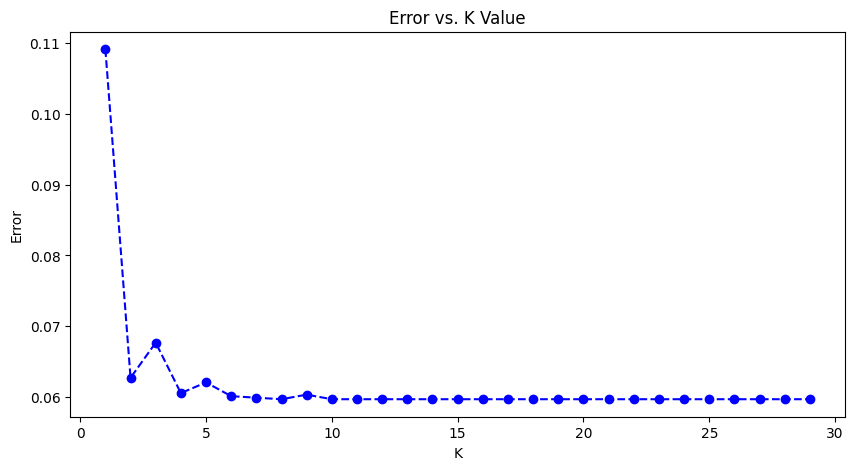

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

error_knn = []
for i in range(1, 30):
 knn = KNeighborsClassifier(n_neighbors = i)
 knn.fit(X_train, y_train)
 pred_i = knn.predict(X_test)
 error_knn.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 30), error_knn, color = 'blue', linestyle = 'dashed', marker = 'o')
plt.title('Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Error')

In [ ]:
k = error_knn.index(min(error_knn)) + 1
k

8

In [ ]:
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_score = accuracy_score(y_test, knn_pred)
knn_score

0.940337224383917

In [ ]:
models.append('K Nearest Neighbours')
scores.append(knn_score)

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0
#selecting random state providing the highest accuracy
for x in range(200):
    dtc = DecisionTreeClassifier(random_state=x)
    dtc.fit(X_train,y_train)
    dtc_pred = dtc.predict(X_test)
    current_accuracy = round(accuracy_score(dtc_pred,y_test)*100,2)
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

In [ ]:
dtc = DecisionTreeClassifier(random_state = best_x)
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
dtc_score = accuracy_score(y_test, dtc_pred)

In [ ]:
dtc_score

0.8977518374405534

In [ ]:
models.append('Decision Tree')
scores.append(dtc_score)

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0
#selecting random state providing the highest accuracy
for x in range(10):
    rfc = RandomForestClassifier(random_state = x)
    rfc.fit(X_train,y_train)
    rfc_pred = rfc.predict(X_test)
    current_accuracy = round(accuracy_score(y_test, rfc_pred)*100,2)
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        rfc_best_x = x

In [ ]:
rfc = RandomForestClassifier(random_state = rfc_best_x)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
rfc_score = accuracy_score(y_test, rfc_pred)

In [ ]:
rfc_score

0.9416342412451362

In [ ]:
models.append('Random Forest')
scores.append(rfc_score)

## XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
xgb_score = accuracy_score(y_test, xgb_pred)

In [ ]:
xgb_score

0.9362300043233895

In [ ]:
models.append('XGBoost')
scores.append(xgb_score)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_score = accuracy_score(y_test, lr_pred)
lr_score

0.940337224383917

In [ ]:
models.append('Logistic Regression')
scores.append(lr_score)

### All Models for selecting Best Model

In [ ]:
models

['Support Vector',
 'Naive Bayes',
 'K Nearest Neighbours',
 'Decision Tree',
 'Random Forest',
 'XGBoost',
 'Logistic Regression']

In [ ]:
scores

[0.940337224383917,
 0.9092088197146563,
 0.940337224383917,
 0.8977518374405534,
 0.9416342412451362,
 0.9362300043233895,
 0.940337224383917]

# Results

In [ ]:
percentage_scores = [score*100 for score in scores]

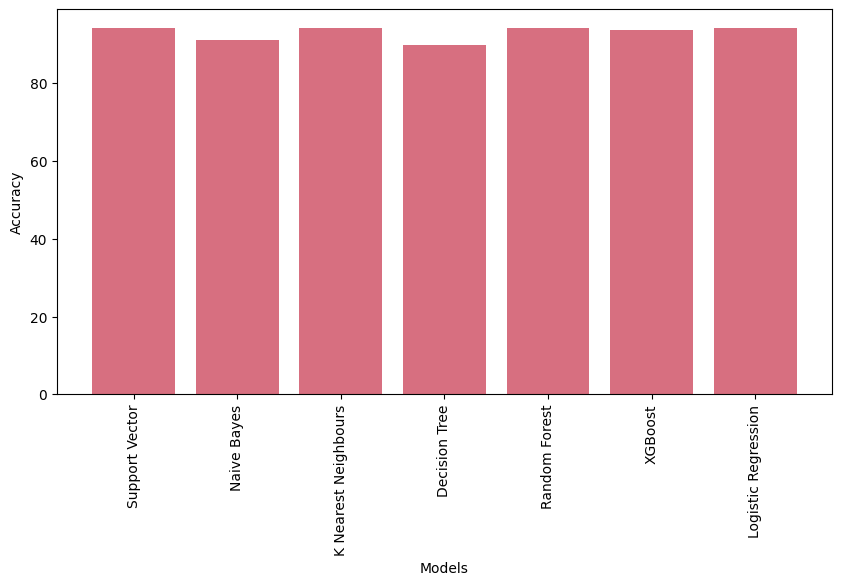

In [ ]:
plt.figure(figsize=(10,5))
heartred = '#D76F80'
plt.bar(models, percentage_scores, color = heartred)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
results = pd.DataFrame(list(zip(models, percentage_scores)), columns =['Models', 'Accuracy (%)'])

In [ ]:
results

,Models,Accuracy (%)
0,Support Vector,94.033722
1,Naive Bayes,90.920882
2,K Nearest Neighbours,94.033722
3,Decision Tree,89.775184
4,Random Forest,94.163424
5,XGBoost,93.623000
6,Logistic Regression,94.033722


Random Forest Regression shows higgest accuracy